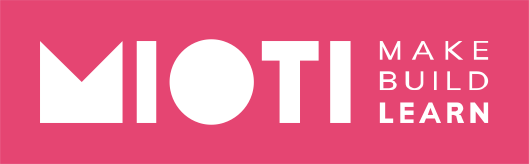
# Intervalos de Confianza

# Estimación paramétrica

Cualquier función de los valores muestrales que puede utilizarse para
estimar parámetros o para ayudarnos a decidir ante las posibles
respuestas a una pregunta o hipótesis sobre la población.

* __Estadístico__: Cualquier función de los valores muestrales que puede utilizarse para estimar parámetros o para ayudarnos a decidir ante las posibles respuestas a una pregunta o hipótesis sobre la población.

__Formulas__

* __Estimador__: Parámetro de los valores muestrales obtenido para dar una idea acerca del parámetro de la población de la que se tomó la muestra. 

> __El valor de un estimador depende de la muestra__

## Distribución en el muestreo de un estadístico

Los estadísticos y estimadores son variables aleatorias que tendrán una distribución de probabilidad con una media y una desviación típica.

> __Ejemplo__:
Si llamamos $X$ a la variable aleatoria cuyos valores resultan de obtener
las medias de muestras del mismo tamaño $(n)$, $\overline{X}$ será una variable
aleatoria y, por tanto, tendrá una media y una varianza (y desv. típica):

$$\mu_{\overline{X}}, \quad \sigma_{\overline{X}}$$ 

Y si fuera posible saber cómo se distribuye (con qué modelo), podríamos
calcular probabilidades de que X se encuentre en el intervalo que nos interese.

* Nuestra muestra nos proporciona uno de los posibles valores del estimador o estadístico. 
* Cuando la media de los posibles valores coincide con el parámetro que quiere estimarse, se dice que el estimador es __insesgado__: 

$$ E(\overline{x}) = \mu, \quad E(s^2) = \frac{n-1}{n} \sigma^2, \quad E(s_c^2) = \sigma^2 $$

*  Para medir cuánto de fiable es el valor de la estimación de nuestra muestra, se tiene el error estándar del estimador, que trata de captar la variabilidad que tienen los valores del estimador en todas las posibles muestras de un tamaño determinado.

$$ Var(\overline{x}) = \frac{s}{\sqrt{n}}, \quad Var(p) = \frac{\sqrt{p(1-p)}}{\sqrt{n}} $$


## Teorema Central del límite

Si $x_1, x_2, x_3, \dots, x_n$ es una muestra aleatoria procedente de una población cualquiera con media $\mu$ y desviación típica $\sigma$, puede deducirse que cuando n crece, $\overline{x}$ tiene una distribución parecida a la 

$$N(\mu; \sigma / \sqrt{n})$$

También: 

$$Z = \frac{\overline{x}-\mu}{\sigma / \sqrt{n}}$$

tiende a tener una distribución parecida a la $N(0, 1)$

In [8]:
import pandas as pd
dataframe = pd.DataFrame(np.random.randint(0,100,size=(10, 4)))# 10 filas y 4 columnas
dataframe

,0,1,2,3
0,32,35,30,31
1,88,14,82,91
2,95,19,71,84
3,88,75,90,16
4,21,62,16,23
5,59,96,14,32
6,38,95,54,89
7,28,78,11,56
8,8,36,58,51
9,38,27,2,61


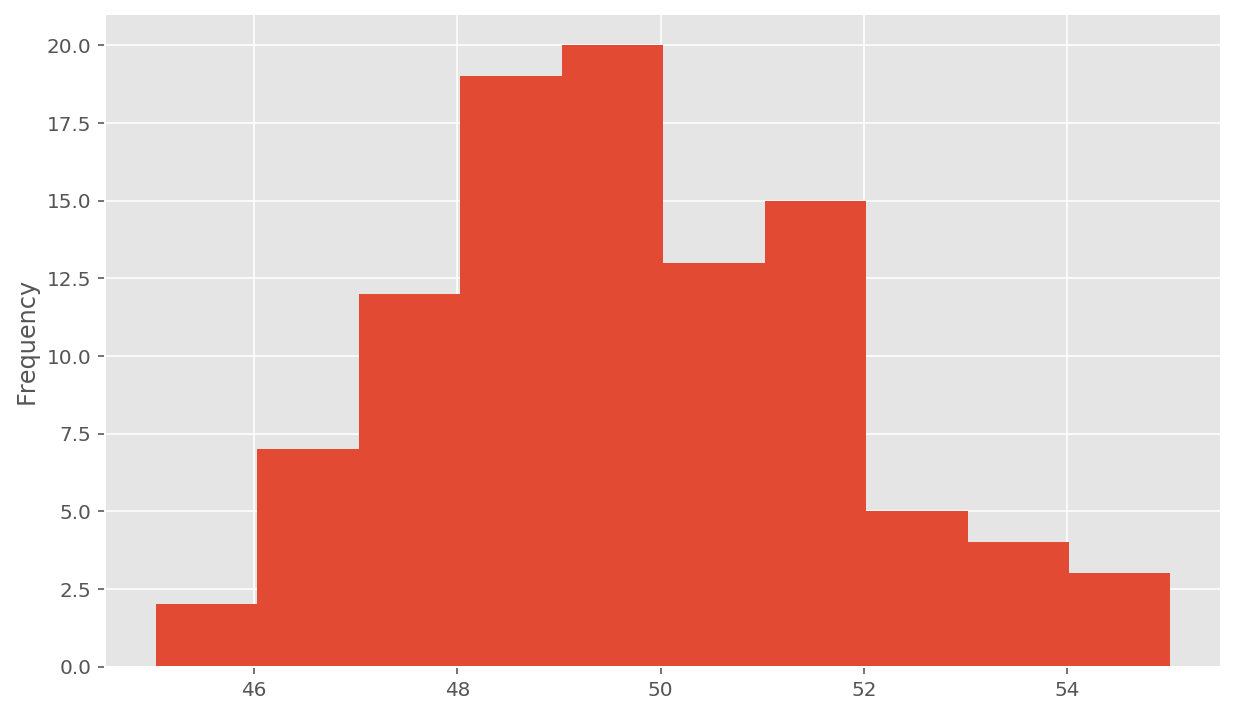

In [10]:
dataframe = pd.DataFrame(np.random.randint(0,100,size=(200, 100))) # 100 columnas y 200 filas 
dataframe.mean().plot(kind='hist');

En el caso de que la muestra $x_1, x_2, \dots x_n$ provenga de una distribución $N(\mu, \sigma)$ y siendo


$$ \overline{x} = \frac{\sum_{i=1}^n x_i }{n} \quad s^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{n-1}$$

entonces se verifica

$$Z=\frac{\overline{x}-\mu}{\sigma/\sqrt{n}} \sim N(0,1), \quad T=\frac{\overline{x}-\mu}{s/\sqrt{n}} \sim t(n-1),
\quad X^2 = \frac{(n-1) s^2}{\sigma^2} \sim \chi^2(n-1)$$

In [18]:
import numpy as np
import scipy.stats as st

X = st.norm(loc=12.0, scale=10.0)

# Distribucion normal , antes del intervalo de confianza hay que comprobar que viene de una disbribucion normal 
samples = pd.DataFrame(X.rvs(size=10000).reshape(100,100))
samples.loc[2,:].describe()


count    100.000000
mean      11.970856
std       10.392157
min      -10.673918
25%        4.584354
50%       14.423151
75%       19.384289
max       39.856459
Name: 2, dtype: float64

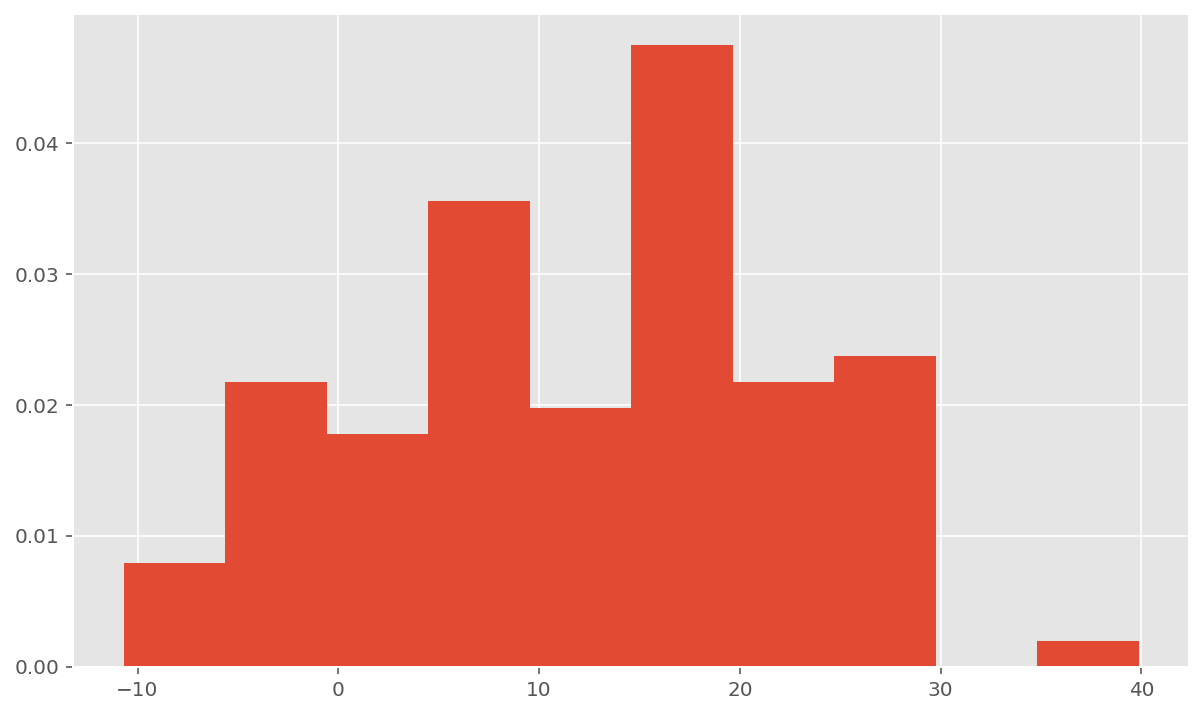

In [19]:
samples.loc[2,:].hist(density=True);

In [20]:
#se le resta 12 
Z=(samples.mean()-12)/(10.0/np.sqrt(100.0)) # dividido por 
T = (samples.mean()-12)/(samples.std()/np.sqrt(100.0))#div por desviacion tipica muestral 
X2 = 99.0*samples.var()/100.0

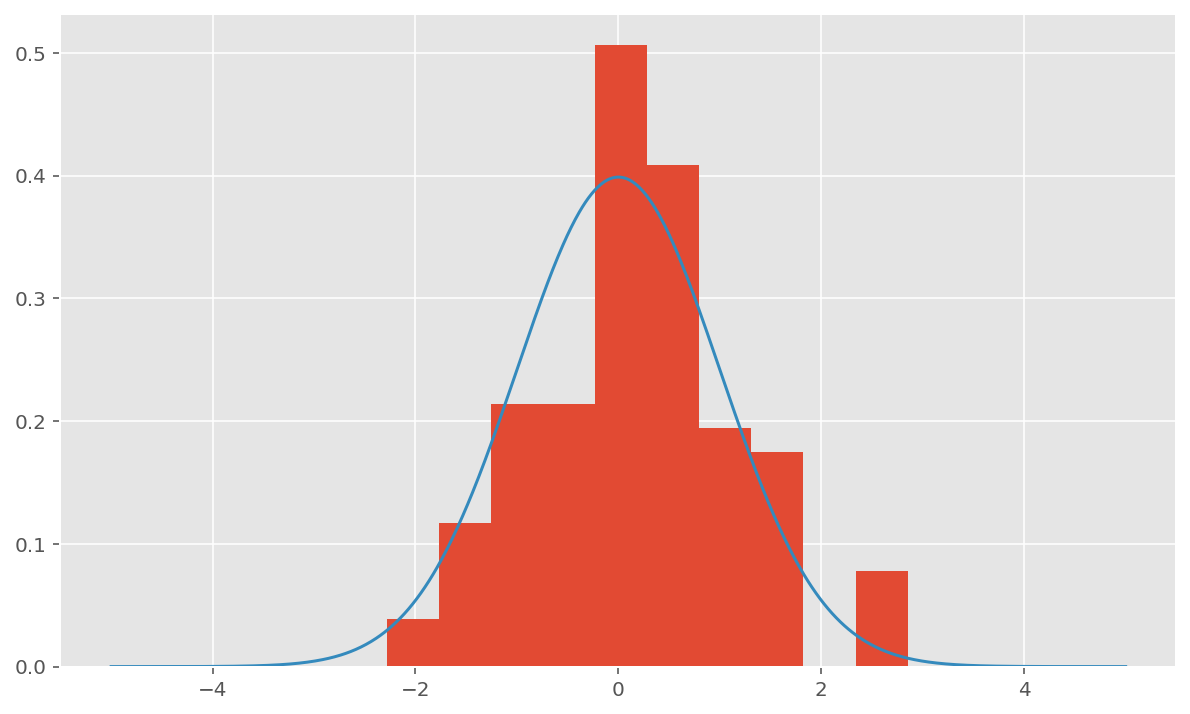

In [21]:
ax=Z.hist(normed=True)
x = np.linspace(-5,5,1000)
#x
y = st.norm(loc=0.0, scale=1.0).pdf(x)#distribucion normal 
#y
ax.plot(x,y);

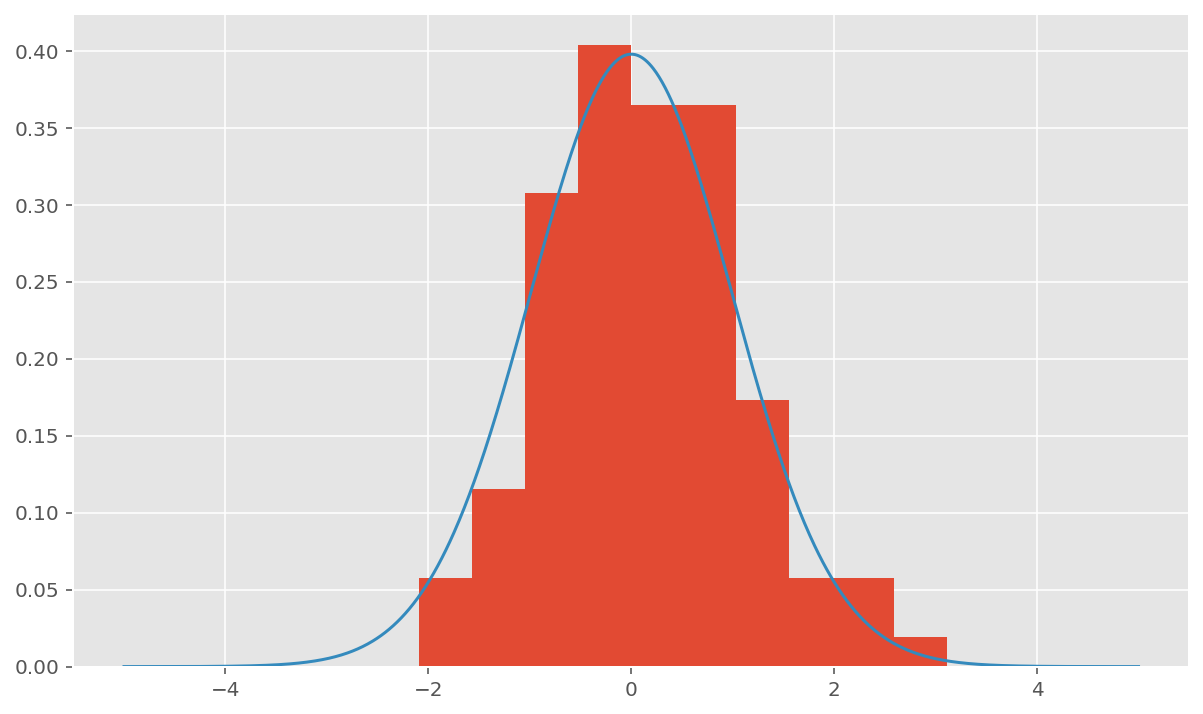

In [22]:
T.hist(normed=True) #chi cuadrado 
tstudent = st.t(df=99).pdf(x)
plot(x,tstudent);

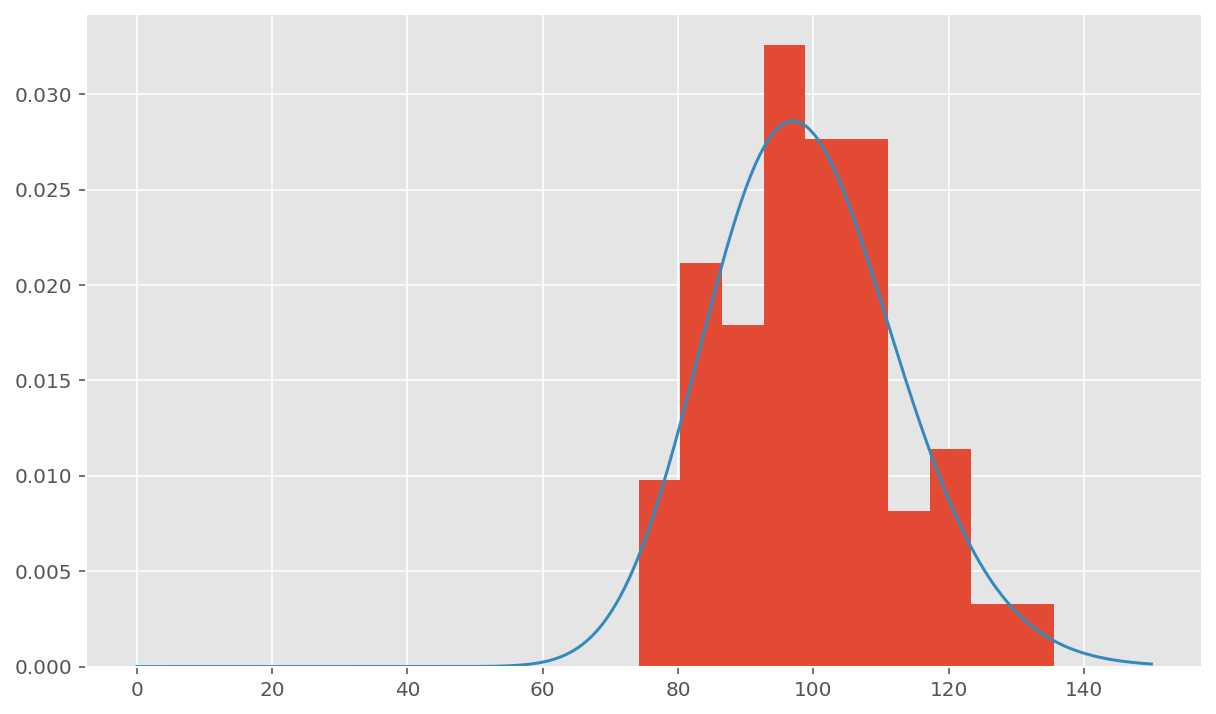

In [23]:
X2.hist(normed=True)
x = np.linspace(0,150,1000)
chi2 = st.chi2(df=99).pdf(x)
plot(x,chi2);

## Intervalos de confianza (UNA POBLACIÓN)


* Los estimadores proporcionan una estimación puntual de los parámetros de la población, pero no proporcionan ninguna idea de la precisión de tal estimación ni de la probabilidad de que tal estimación sea la correcta.
* Los intervalos de confianza son un medio de conocer el valor de un parámetro en una población, midiendo el grado de error debido al azar que lleva implícito el proceso.

## Definición:

Un intervalo de confianza es un método de estimación que permite estimar un
parámetro poblacional a partir de un intervalo aleatorio $(L_1, L_2)$ del que se tiene
una cierta confianza, medida en probabilidad, de que contiene al verdadero valor
del parámetro poblacional.

Su construcción se basa en obtener los extremos $L_1$ y $L_2$ (estadísticos) a partir de las
distribuciones en el muestreo.


## Intervalo de confianza para $\mu$ de $N(\mu, \sigma)$ con $\sigma$  CONOCIDA

Si $x_1, x_2, \dots x_n$ es una muestra aleatoria procedente de una
población $N(\mu, \sigma)$ con $\sigma$ __conocida__, hemos visto que 

$$Z=\frac{\overline{x}-\mu}{\sigma/\sqrt{n}} \sim N(0,1)$$

y utilizando el percentil $z_{1- \frac{\alpha}{2}}$ de la $N(0,1)$ se tendrá que:

$$P \left(
-z_{1- \frac{\alpha}{2}} <
\frac{\overline{x}-\mu}{\sigma/\sqrt{n}} <
z_{1- \frac{\alpha}{2}}
\right) = 1-\alpha
$$

De la expresión anterior se deduce que: 

$$ P \left(
\overline{x}-z_{1- \frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} <
\mu <
\overline{x}+z_{1- \frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}}
\right) = 1 - \alpha
$$

indicando que hay una probabilidad de $(1-\alpha)$ de que el verdadero valor de la media $\mu$ de la población se encuentre entre las cantidades 

$$L_1=\overline{x}-z_{1- \frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \quad \mbox{ y } \quad L_2 = \overline{x}+z_{1- \frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}}
$$

Por tanto, el intervalo al $100\cdot (1 - \alpha) \%$ de confianza para $\mu$ cuando SE CONOCE $\sigma$ es

$$ IC_{100\cdot(1-\alpha) \%} (\mu) = \left(
\overline{x}-z_{1- \frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}},
\overline{x}+z_{1- \frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}}
\right) $$

In [24]:
def mean_confidence_interval(data, sigma=1.0, alpha=0.05):
    #con sigma conocido 1.0
    
    m = data.mean()# media de los datos 
    #st.norm.ppf es la funcion percentil 
    h = st.norm.ppf(1.0-(alpha/2.)) * (sigma / np.sqrt(data.size))
    # por sigma y la raiz cuadrada del tamaño 
    return m, m-h, m+h

a = samples.iloc[:,0]
mean_confidence_interval(a, sigma=10.0) # X = st.norm(loc=12.0, scale=10.0)

(13.013193011082242, 11.053229026542187, 14.973156995622297)

In [25]:
st.norm.interval(0.95, loc=a.mean(), scale=10.0/np.sqrt(a.size)) 
# Endpoints of the range that contains alpha percent of the distribution
#estimador de confianza es el resultado 

(11.053229026542187, 14.973156995622297)

## Intervalo de confianza para $\mu$ de $N(\mu, \sigma)$ con $\sigma$  DESCONOCIDA

Si $x_1, x_2, \dots x_n$ es una muestra aleatoria procedente de una
población $N(\mu, \sigma)$ con $\sigma$ __deconocida__, hemos visto que

$$ T=\frac{\overline{x}-\mu}{s/\sqrt{n}} \sim t(n-1) $$

Entonces

$$ IC_{100\cdot(1-\alpha) \%} (\mu)  = \left(
\overline{x}-t(n-1)_{1- \frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}},
\overline{x}+t(n-1)_{1- \frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}}
\right) $$

In [26]:
st.t.interval(alpha=0.95, df=a.size-1.0, loc=a.mean(), scale=a.sem())

(10.961164405817833, 15.065221616346651)

## Intervalo de confianza para $\sigma^2$ de $N(\mu, \sigma)$

Si $x_1, x_2, \dots x_n$ es una muestra aleatoria procedente de una
población $N(\mu, \sigma)$, hemos visto que

$$ X^2 = \frac{(n-1) s^2}{\sigma^2} \sim \chi^2(n-1) $$

Entonces

$$ IC_{100\cdot(1-\alpha) \%} (\sigma^2) = \left(
\frac{(n-1) \cdot s^2}{\chi^2_{1-\frac{\alpha}{2}}(n-1)},
\frac{(n-1) \cdot s^2}{\chi^2_{\frac{\alpha}{2}}(n-1)}
\right) $$


In [27]:
a.var() # X = st.norm(loc=12.0, scale=10.0)

106.95190141365374

In [28]:
(a.size-1.0)*a.var()/st.chi2.ppf(1.-0.05/2., a.size-1.0)

82.44879519282837

In [29]:
(a.size-1.0)*a.var()/st.chi2.ppf(0.05/2., a.size-1.0)

144.33045713535924

__[Ejercicio]__ Crear una función que calcule el intervalo de confianza para la varianza poblacional

## Intervalo de confianza para una proporción aproximado por la normal

Si $x_1, x2, \dots , x_n$ es una muestra aleatoria procedente de una población donde los individuos pueden presentar o no una característica con probabilidad $\pi$ (proporción poblacional), y $x$ es el número de los que la presentan entre los $n$ elegidos, entonces si llamamos $p = x/n$ (proporción muestral) se cumple que 


$$x \sim N \left( n\pi, \sqrt{n \pi (1-\pi)} \right), \quad \mbox{es decir} \quad
p = \frac{x}{n} \sim N \left( \pi, \sqrt{\pi (1- \pi) / n} \right) $$

__siempre que__ $x = n·p > 5$, $p > 0.05$, $n – x = n·(1-p) > 5$ y $(1-p) > 0.05$

El resultado anterior obtenido en el muestreo, nos permite construir un intervalo de confianza para la proporción poblacional $\pi$, dado por

$$ IC_{100\cdot(1-\alpha) \%} (\pi)  = \left(
p-z_{1- \frac{\alpha}{2}} \cdot \sqrt{\frac{p(1-p)}{n}} - \frac{1}{2n},
p+z_{1- \frac{\alpha}{2}} \cdot \sqrt{\frac{p(1-p)}{n}} + \frac{1}{2n}
\right) $$


#### [Ejemplo]

En el caso de querer estimar mediante un IC al 99% de la proporción de
fumadores en una población, a partir de una muestra de 80 individuos,
de los cuales 37 fumaban, se tendrá:

In [30]:
37/80-st.norm.ppf(1-0.01/2)*np.sqrt((37/80)*(1-37/80)/80) - 1/(2.*80)

0.31266231655752486

In [31]:
37/80+st.norm.ppf(1-0.01/2)*np.sqrt((37/80)*(1-37/80)/80) + 1/(2.*80)

0.6123376834424752

__[Ejercicio]__ Crear una función que calcule el intervalo de confianza para una proporción poblacional.  

## Intervalos de confianza (DOS POBLACIONES)


In [32]:
drinks = pd.read_csv('drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


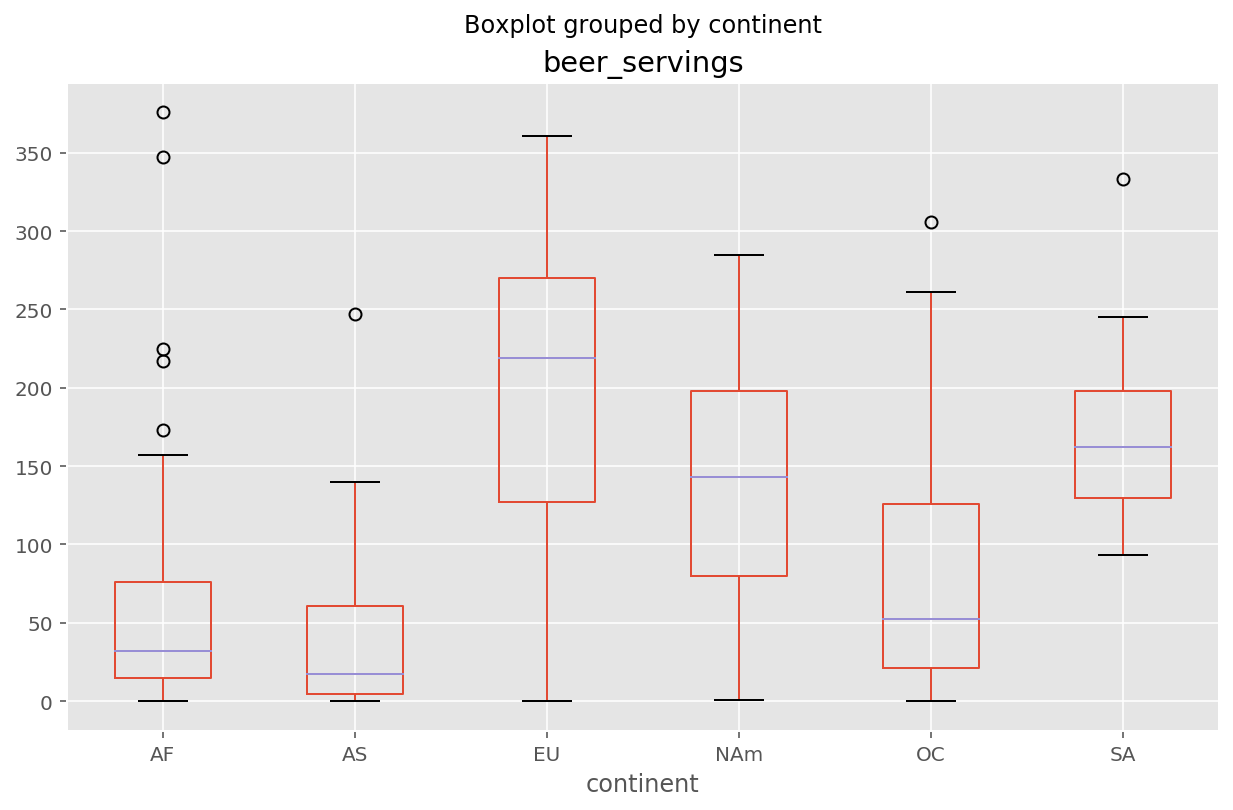

In [33]:
drinks.boxplot(column='beer_servings', by='continent');

## Intervalo de confianza para $\mu_1 -\mu_2$:

Sean $X \sim N(\mu_1,\sigma_1)$, $Y \sim N(\mu_2,\sigma_2)$ __INDEPENDIENTES__:
    
* Conocemos $\sigma^2_1$ y $\sigma^2_2$:

$$IC_{100\cdot(1-\alpha) \%}(\mu_1 -\mu_2)= (\overline{x}- \overline{y}) \mp z_{1- \frac{\alpha }{2}} \cdot \sqrt{\frac{\sigma^2_1}{n}+\dfrac{\sigma^2_2}{m}}$$
    
* Desconocemos $\sigma^2_1$ y $\sigma^2_2$, pero sabemos que $\sigma^2_1= \sigma^2_2$:
    
$$IC_{100\cdot(1-\alpha) \%}(\mu_1 -\mu_2)= (\overline{x}- \overline{y}) \mp t(n+m-2)_{1- \frac{\alpha }{2}} \cdot \sqrt{\dfrac{(n-1) s_1^2 + (m-1) s_2^2}{n+m-2}} \cdot \sqrt{\frac{1}{n}+\dfrac{1}{m}}$$

* Desconocemos $\sigma^2_1$ y $\sigma^2_2$, pero sabemos que $\sigma^2_1 \neq \sigma^2_2$:

$$IC_{100\cdot(1-\alpha) \%}(\mu_1 -\mu_2)= (\overline{x}- \overline{y}) \mp t(n+m-2-g)_{1- \frac{\alpha }{2}} \cdot \sqrt{\dfrac{s_1^2}{n}+\dfrac{s_2^2}{m}}$$
            siendo $g= \dfrac{[(m-1)T_1-(n-1)T_2]^2}{(m-1)T_1^2+(n-1)T_2^2}$, $T_1= \dfrac{s_1^2}{n}$ y $T_2= \dfrac{s_2^2}{m}$


In [35]:
muestra1 = drinks[drinks.continent=='EU']
muestra2 = drinks[drinks.continent=='AS']

import statsmodels.stats.api as sms

In [36]:
sms.DescrStatsW(muestra1.beer_servings).mean
#muestra1.beer_servings.describe()

193.77777777777777

In [37]:
sms.CompareMeans(sms.DescrStatsW(muestra1.beer_servings), sms.DescrStatsW(muestra2.beer_servings)).tconfint_diff(alpha=0.05, usevar='unequal')

(123.53871260599853, 189.9259338586479)

In [38]:
muestra3 = drinks[drinks.continent=='AF']

sms.CompareMeans(sms.DescrStatsW(muestra1.beer_servings), sms.DescrStatsW(muestra3.beer_servings)).tconfint_diff(alpha=0.05, usevar='pooled')

(96.17151909815581, 168.44064023098466)

## Intervalo de confianza para $\sigma ^2_1 / \sigma ^2_2 $
Sean $X \sim N(\mu_1,\sigma_1)$, $Y \sim N(\mu_2,\sigma_2)$ __INDEPENDIENTES__
        $$IC_{100\cdot(1-\alpha) \%}(\sigma ^2_1 / \sigma ^2_2)= \left[ F(m-1,n-1)_{\frac{\alpha}{2}} \cdot \dfrac{s_1^2}{s_2^2}, F(m-1,n-1)_{1- \frac{\alpha}{2}} \cdot \dfrac{s_1^2}{s_2^2}    \right]$$

__[Ejercicio]__ Crear una función que calcule el intervalo de confianza para el conciente de varianzas.

## Intervalo de confianza para $p_1-p_2$

Sean $X \sim \mathcal{B}e(p_1)$, $Y \sim \mathcal{B}e(p_2)$ (independientes)
        $$IC_{100\cdot(1-\alpha) \%}(p_1-p_2)= \left[(\overline{p_1}- \overline{p_2})\mp z_{1- \frac{\alpha }{2}} \cdot \sqrt{\dfrac{\overline{p_1} (1- \overline{p_1})}{n}+ \dfrac{\overline{p_2} (1- \overline{p_2})}{m}}  \right]$$